# 2. Fashin MNIST
#### MNIST 패션 이미지를 딥러닝을 이용하여 분류하시오.
MNIST 패션데이터는 10종류의 60000개 패션 학습데이터와 10000개의 테스트 데이터로 구성되어 있습니다.
손글씨 데이터 분류처럼 패션 데이터를 딥러닝을 이용하여 분류하시오.

In [56]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test0, y_test) = fashion_mnist.load_data()

(9, <matplotlib.image.AxesImage at 0x224e4aa4f48>)

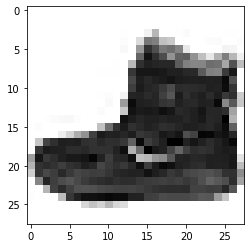

In [57]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary) # Ankle boot

In [58]:
y_train = to_categorical(y)
y_test = to_categorical(y_test)

In [59]:
net = models.Sequential()
net.add(layers.Dense(512, activation= 'relu', input_shape=(28*28,)))
net.add(layers.Dropout(0.4))
net.add(layers.Dense(512, activation= 'relu'))
net.add(layers.Dropout(0.4))
net.add(layers.Dense(512, activation= 'relu'))
net.add(layers.Dense(10, activation= 'softmax'))
net.compile(optimizer='nadam', loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
# preprocessionmg
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test0.reshape((10000, 28*28))
X_test = X_test/255

In [61]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [62]:
val = net.fit(partial_X_train, partial_y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
391/391 [==============================] - 6s 17ms/step - loss: 0.6043 - accuracy: 0.7802 - val_loss: 0.4366 - val_accuracy: 0.8315
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 0.4339 - accuracy: 0.8408 - val_loss: 0.3696 - val_accuracy: 0.8637
Epoch 3/30
391/391 [==============================] - 6s 16ms/step - loss: 0.3976 - accuracy: 0.8545 - val_loss: 0.3891 - val_accuracy: 0.8564
Epoch 4/30
391/391 [==============================] - 6s 16ms/step - loss: 0.3719 - accuracy: 0.8622 - val_loss: 0.3340 - val_accuracy: 0.8748
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 0.3572 - accuracy: 0.8683 - val_loss: 0.3288 - val_accuracy: 0.8805
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.3407 - accuracy: 0.8733 - val_loss: 0.3175 - val_accuracy: 0.8808
Epoch 7/30
391/391 [==============================] - 6s 16ms/step - loss: 0.3346 - accuracy: 0.8762 - val_loss: 0.3263 - val_accuracy: 0.8803

In [63]:
# net.fit(X_train, y_train, epochs=30, batch_size=128)

In [64]:
test_loss, test_acc = net.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8924


## 89.24 %